In [1]:
from IPython.core.display import HTML
HTML("""<style>
.answers { 
    visibility: hidden;
}
</style>""")

In [2]:
from notebook.services.config import ConfigManager
icm = ConfigManager()
icm.update('livereveal', {
              'theme': 'simple',
              'transition': 'convex',
              'start_slideshow_at': 'selected'
});

# Python Analysis Figures
Author: Barron H. Henderson

In [3]:
# Prepare my slides
%pylab inline
%cd working

Populating the interactive namespace from numpy and matplotlib
/Users/barronh/Development/RAQMSandPython/working


# Data for Figures

In this exercise, we will assume that you have completed the Common Data Model section and, therefore, have the files we expect.

# CHECK POINT:
List the size of of the file you downloaded

In [4]:
import os
aconcpath = 'cmaq/CCTM_D502a_Linux2_x86_64intel.ACONC.GA12C_20060801.nc4'
metcro3dpath = 'cmaq/METCRO3D_Benchmark.nc4'
dc3path = 'icartt/dc3-mrg60-dc8_merge_20120518_R7_thru20120622.ict'
for path in [aconcpath, metcro3dpath, dc3path]:
    print('%5.1fM' % (os.path.getsize(path)/1024.**2), path)


253.5M cmaq/CCTM_D502a_Linux2_x86_64intel.ACONC.GA12C_20060801.nc4
 51.7M cmaq/METCRO3D_Benchmark.nc4
 30.6M icartt/dc3-mrg60-dc8_merge_20120518_R7_thru20120622.ict


# ANSWERS Hidden

<div class="answers">
```
253.5M cmaq/CCTM_D502a_Linux2_x86_64intel.ACONC.GA12C_20060801.nc4
 51.7M cmaq/METCRO3D_Benchmark.nc4
 30.6M icartt/dc3-mrg60-dc8_merge_20120518_R7_thru20120622.ict
```
</div>

In [5]:
# Import PseudoNetCDF Processor (PNC)
from PseudoNetCDF import PNC
help(PNC)

Help on function PNC in module PseudoNetCDF.pncparse:

PNC(*args, ifiles=[], actions=None, **kwds)
    Arguments:
        args - Command Line arguments/options for PseudoNetCDF
               for full list of potential args PNC('--help')
        ifiles - (optional) pre-loaded input files
        actions -  (default: False)
            False: only open files do not make outputs
            True: enable dump,gen,map,etc output actions
                  for action options see subparsers help
                  e.g., PNC('dump', '--help', actions = True)
    
    Returns:
        out - Namespace object with parsed arguments
              including a list of processed files (out.ifiles)
    
    Example:
        # Single File
        out = PNC('--format=netcdf', inpath)    
        infile = out.ifiles[0]
        O3 = infile.variables['O3']
    
        # Multiple Files
        out = PNC('--format=netcdf', inpath1, inpath2)    
        infile1, infile2 = out.ifiles
        O3_1 = infile1.vari

# Check Point

- How would you find out what actions are available?
- List 3 other actions that are available?
- What do you think they do?


# Answers Hidden

<div class="answers">
```
PNC('--help', actions = True)
```
Example answer:
- gen: generate output files like ncgen
- map: create maps of data
- plot: create a a variables (1-D)
- plotts: plot a time series
</div>

## Time series

Make time series plots with 3 different methods from CMAQ data.

1. Python Environment
2. Python with PseudoNetCDF
3. Command Line Interface (terminal or DOS)
4. Advanced users will add observations
5. Advanced users will add another species on a secondary axis
6. Advanced users will repeat with CAMx or GEOS-Chem

# Python Environment

1. Start easy with a 2-d line plot
2. Add real data
3. Transform data to time.

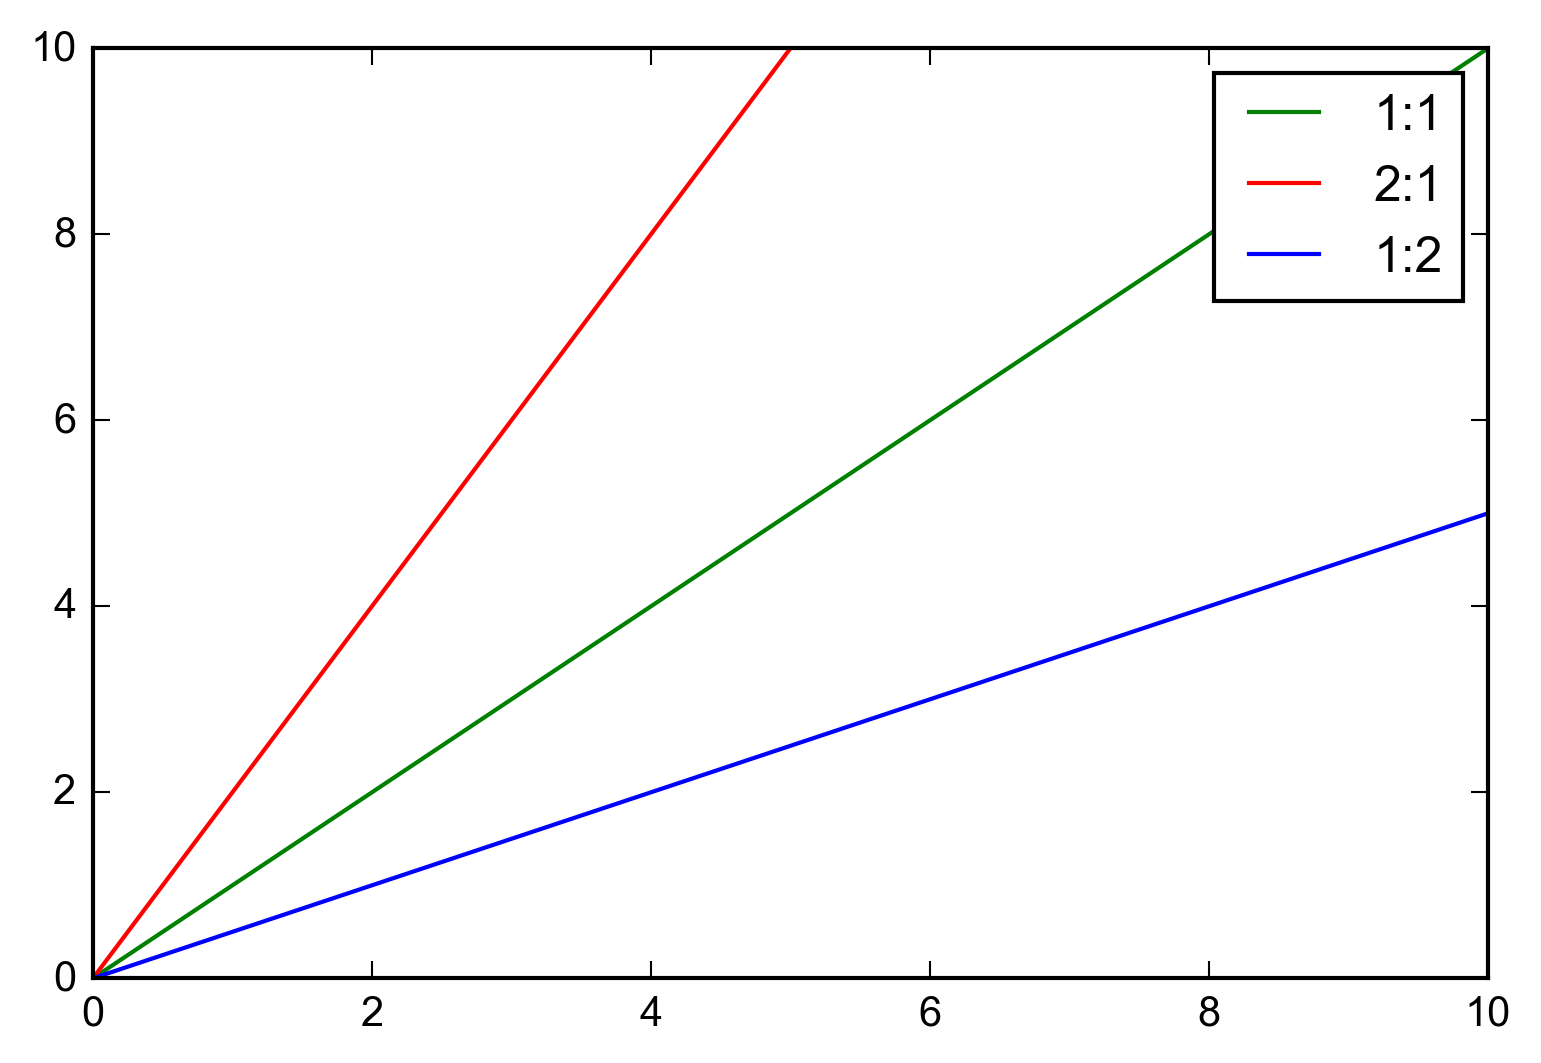

In [6]:
close()
plot([0,10], [0,10], linestyle = '-', color = 'g', label = '1:1')
plot([0,5], [0,10], linestyle = '-', color = 'r', label = '2:1')
plot([0,10], [0,5], linestyle = '-', color = 'b', label = '1:2')
legend();
#savefig('temp.png')

# Python with DC3 data

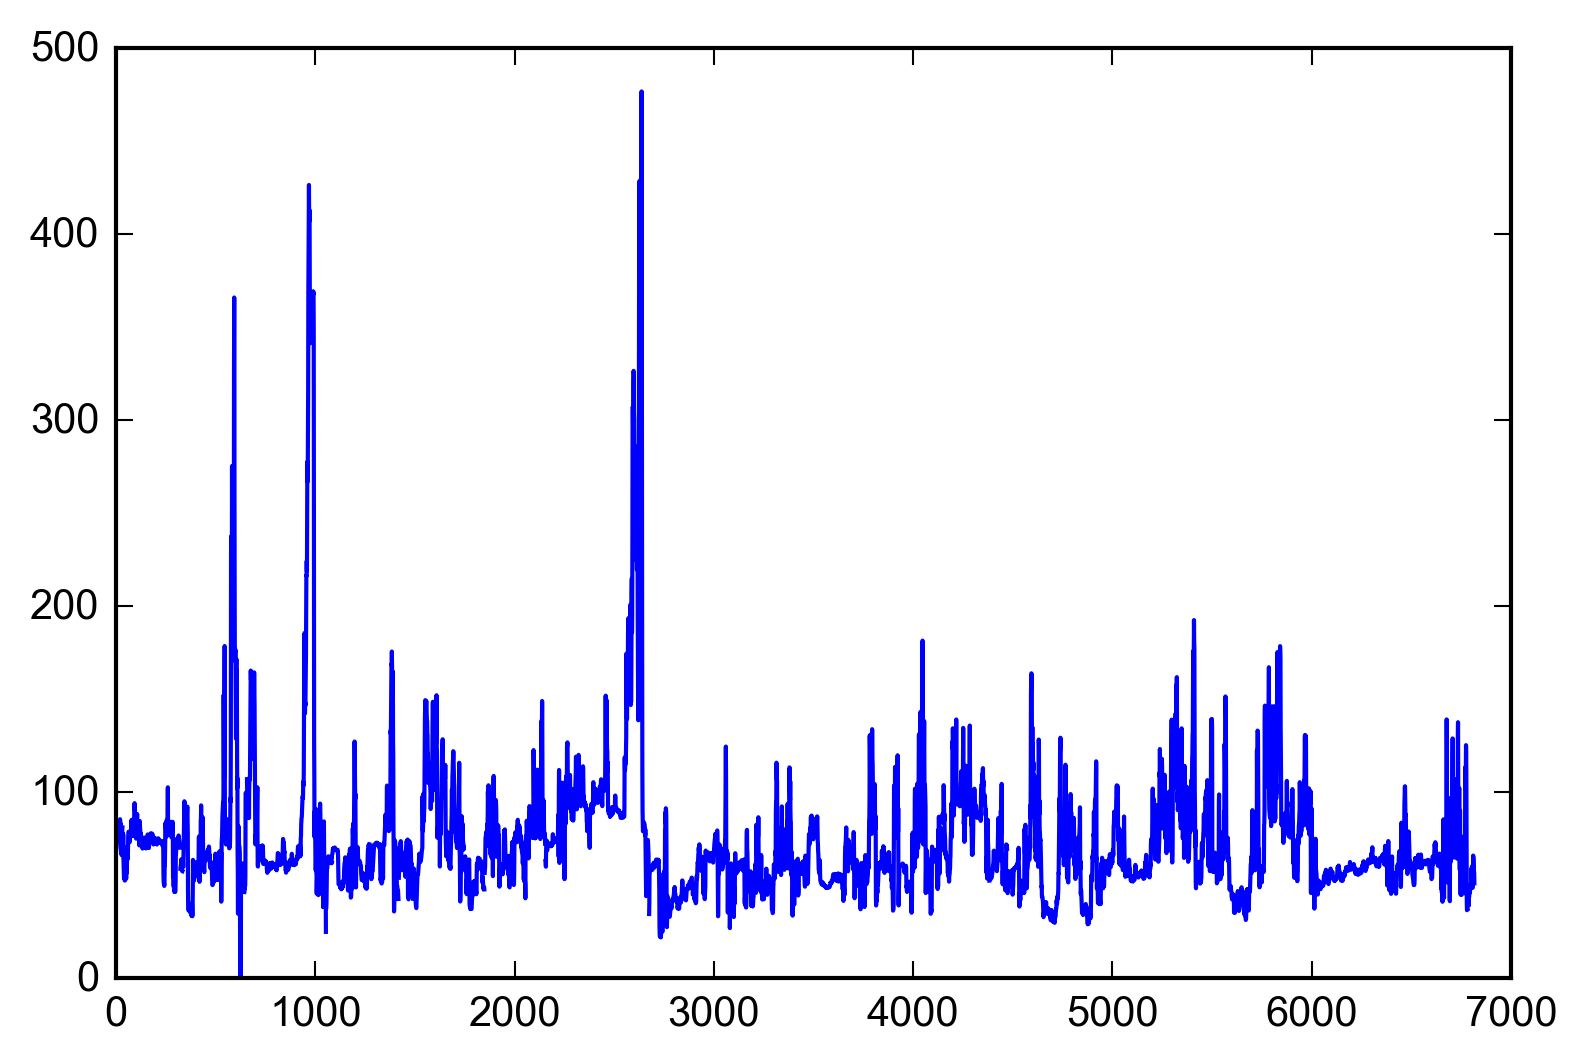

In [7]:
from PseudoNetCDF import PNC
dc3args = PNC('--format=ffi1001', dc3path)
dc3o3 = dc3args.ifiles[0].variables['O3_ESRL']
plot(dc3o3);

# DC3 x-coordinate

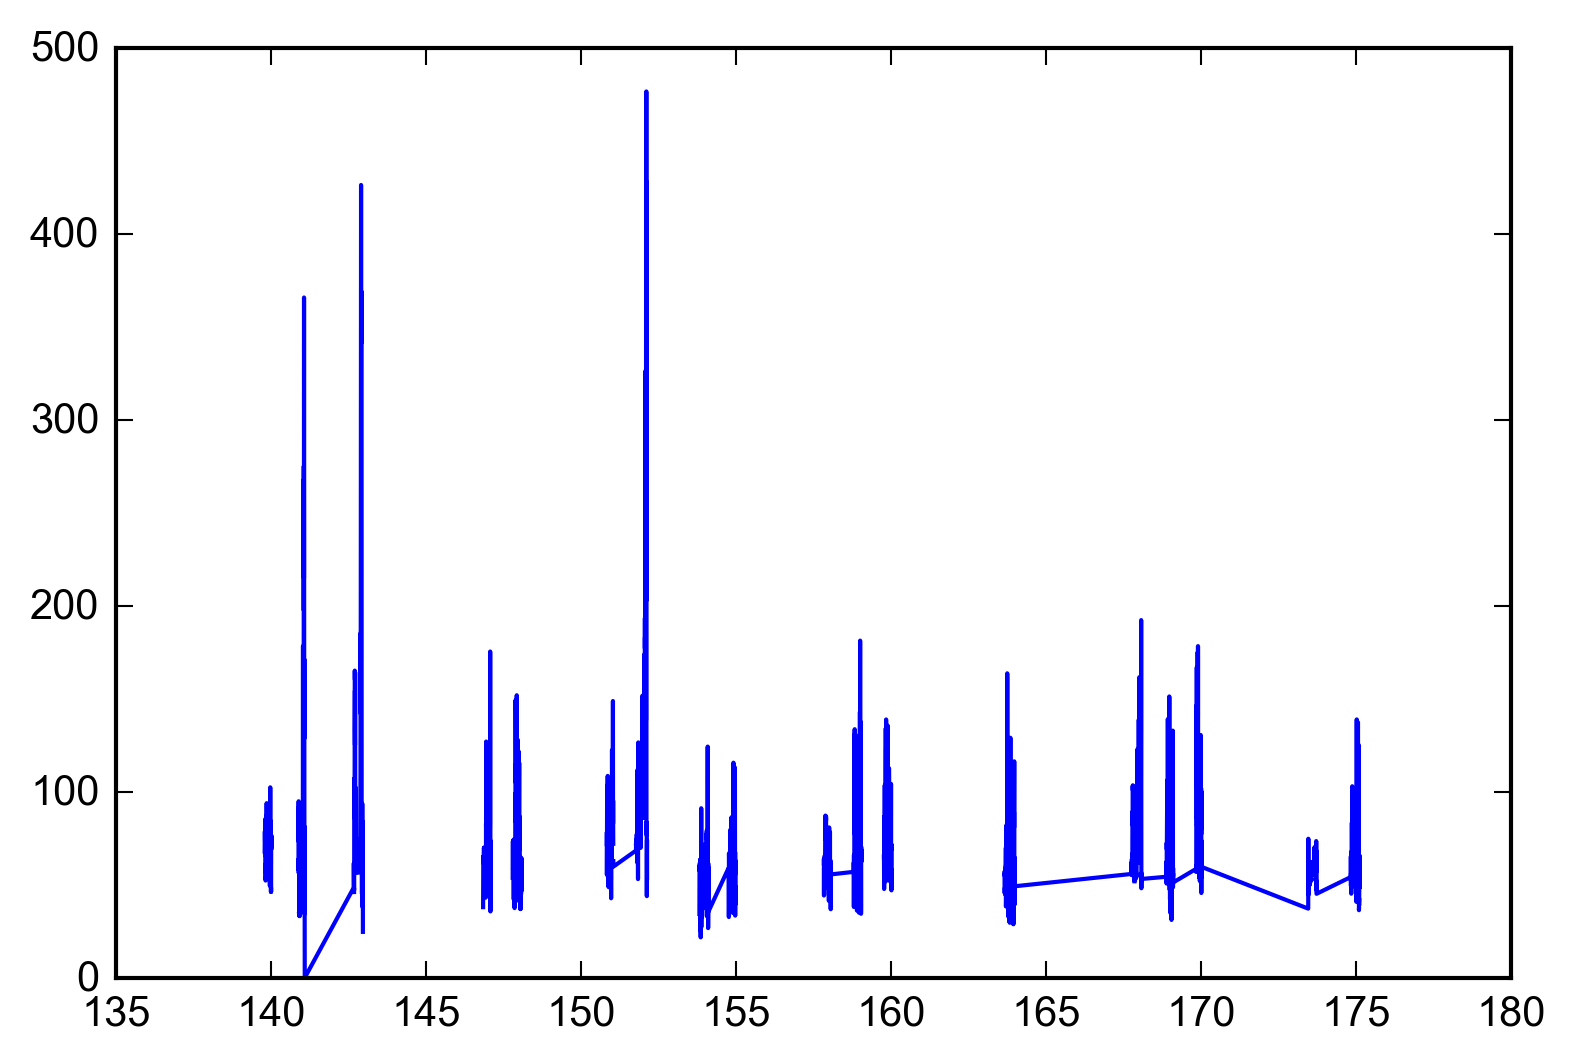

In [8]:
dc3args = PNC('--format=ffi1001', dc3path)
dc3file = dc3args.ifiles[0]
fdays = dc3file.variables['Fractional_Day']
o3 = dc3file.variables['O3_ESRL']
plot(fdays, o3);

# Python with date

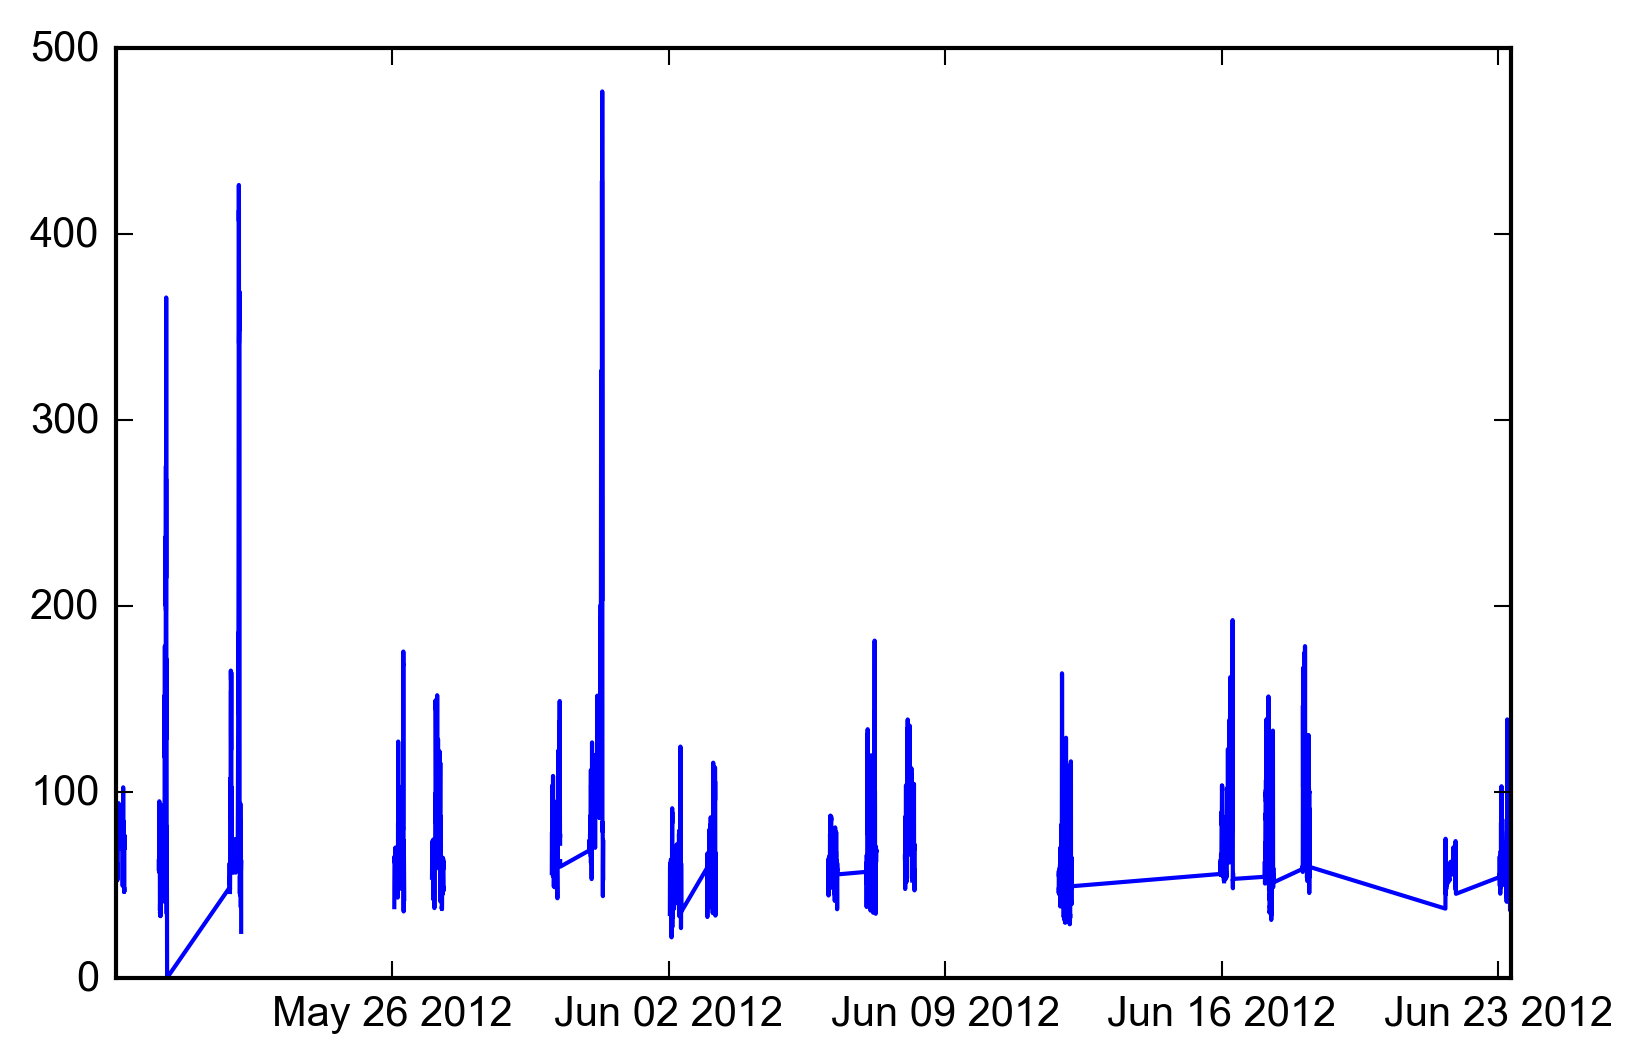

In [9]:
import datetime
offset = datetime.datetime(2011, 12, 31).timestamp()
xdate = [datetime.datetime.utcfromtimestamp(offset + fday * 24*3600) for fday in fdays]
plot(xdate, o3);

# Python with pretty date

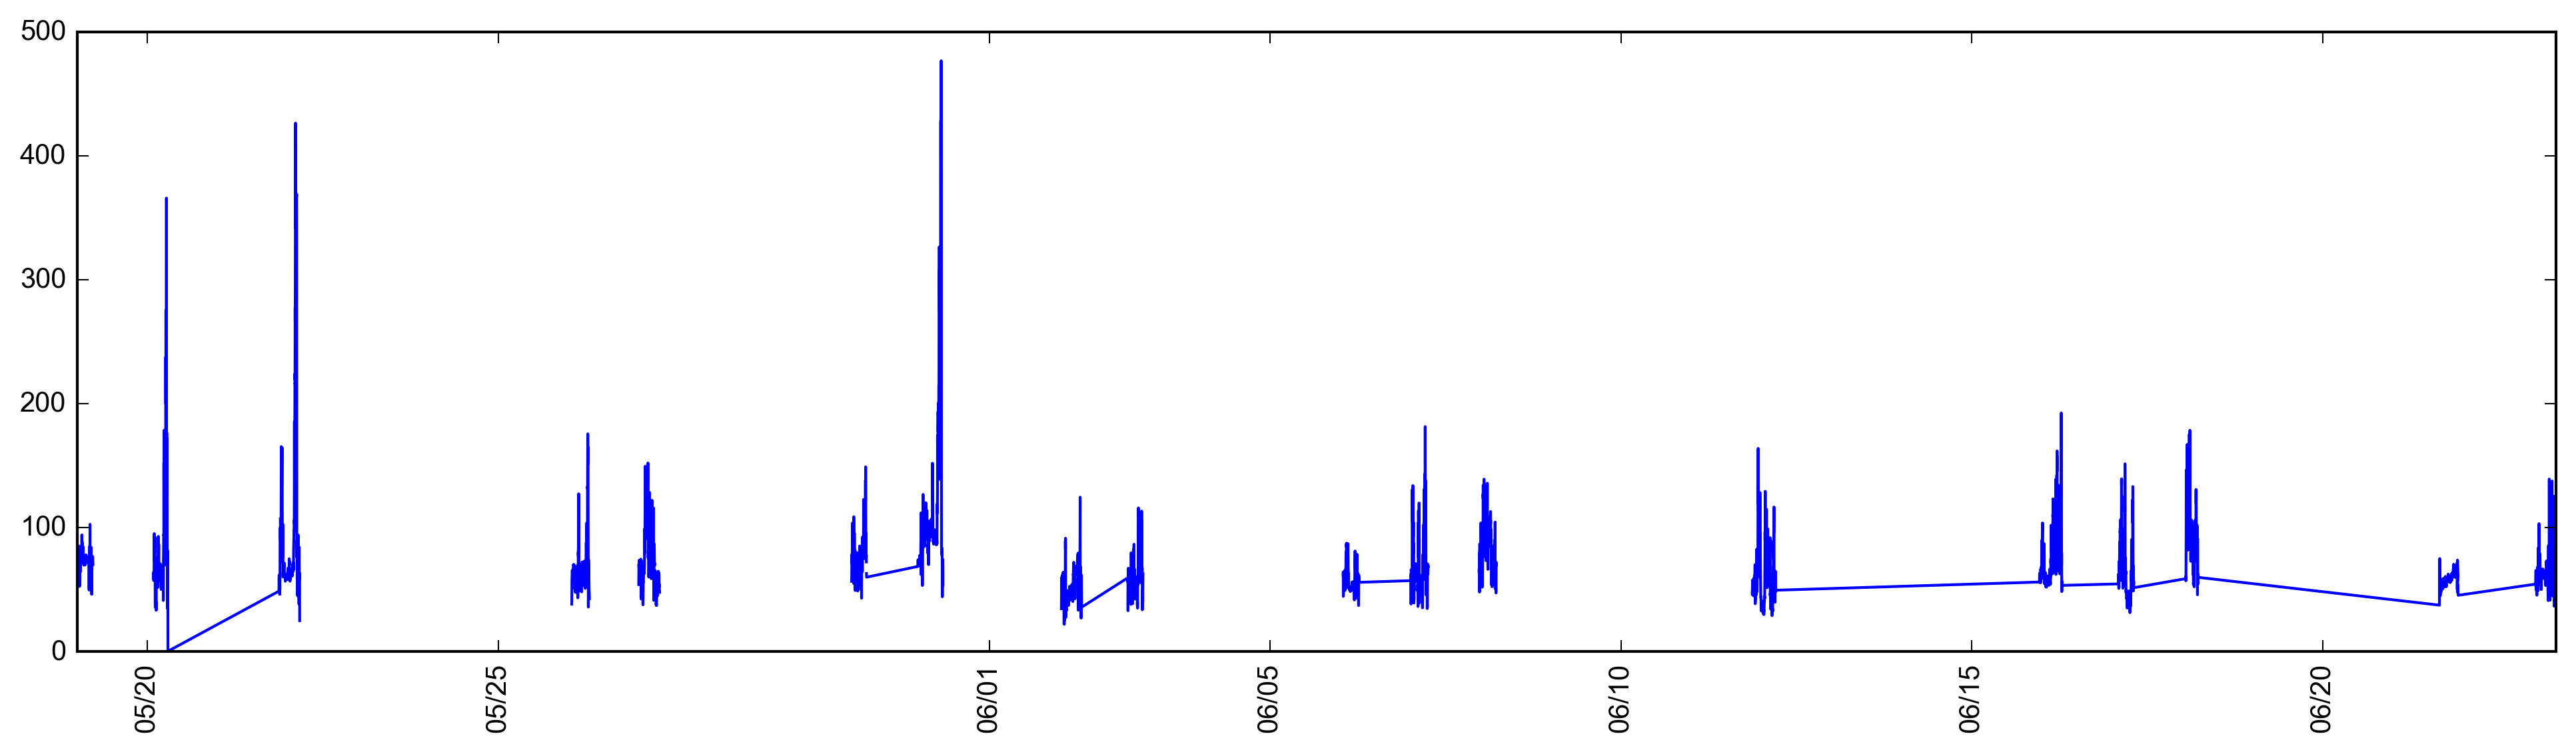

In [10]:
import datetime
figure(figsize = (16,4), dpi = 600)
plot(xdate, o3)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(bymonthday = [1, 5, 10, 15, 20, 25]))
plt.setp(ax.get_xticklabels(), rotation = 90);

**PNC:/Users/barronh/anaconda3/envs/atmsci/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531:UserWarning:
  No labelled objects found. Use label='...' kwarg on individual plots.


tsO3_ESRL.png


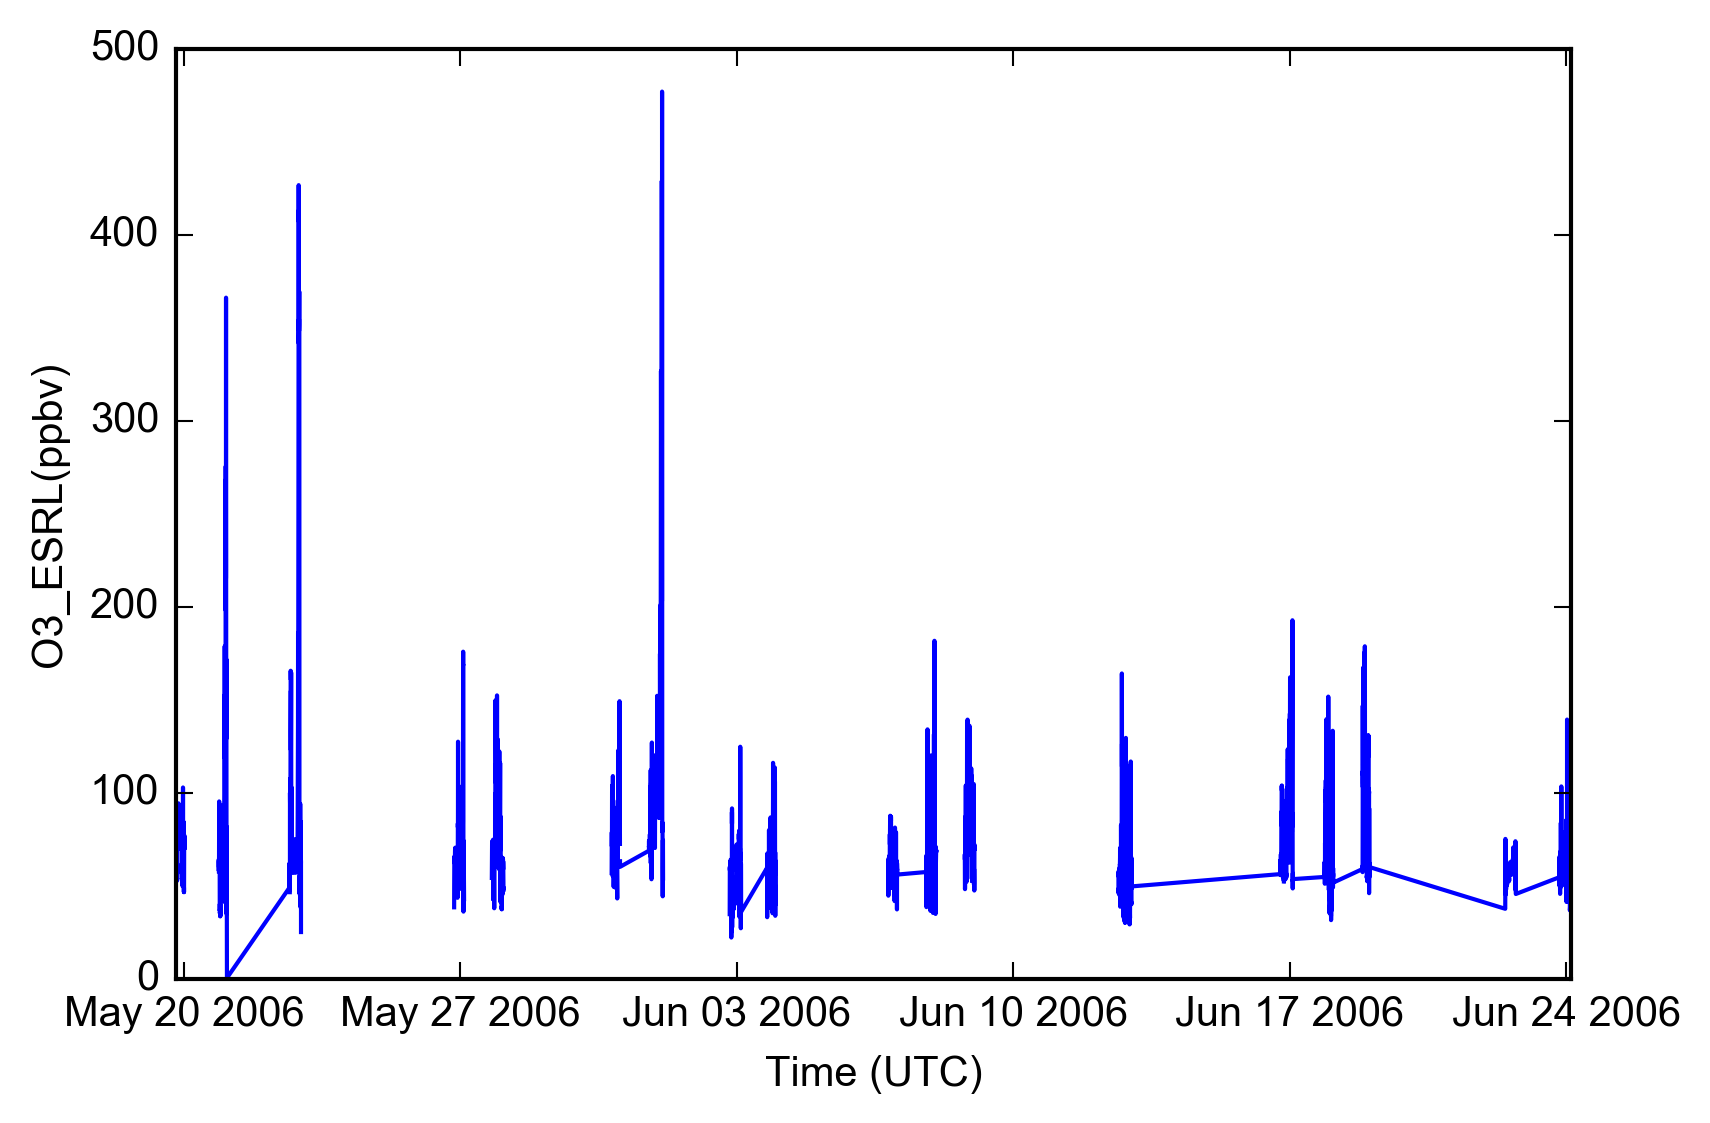

In [11]:
PNC('plotts', '--figroot=ts', '--variables=O3_ESRL', 
    '--format=ffi1001', '--coordkeys=Fractional_Day',
    '--expr=time=Fractional_Day;time.units="days since 2005-12-31"', dc3path);

## Scatter Plots

1. Python Environment (replace plot with scatter, utc with some other variable)
2. Python with PseudoNetCDF
3. Command Line Interface (terminal or DOS) (replace pncts.py with pncscatter.py)
4. Advanced users will switch from time/space paired to rank paired

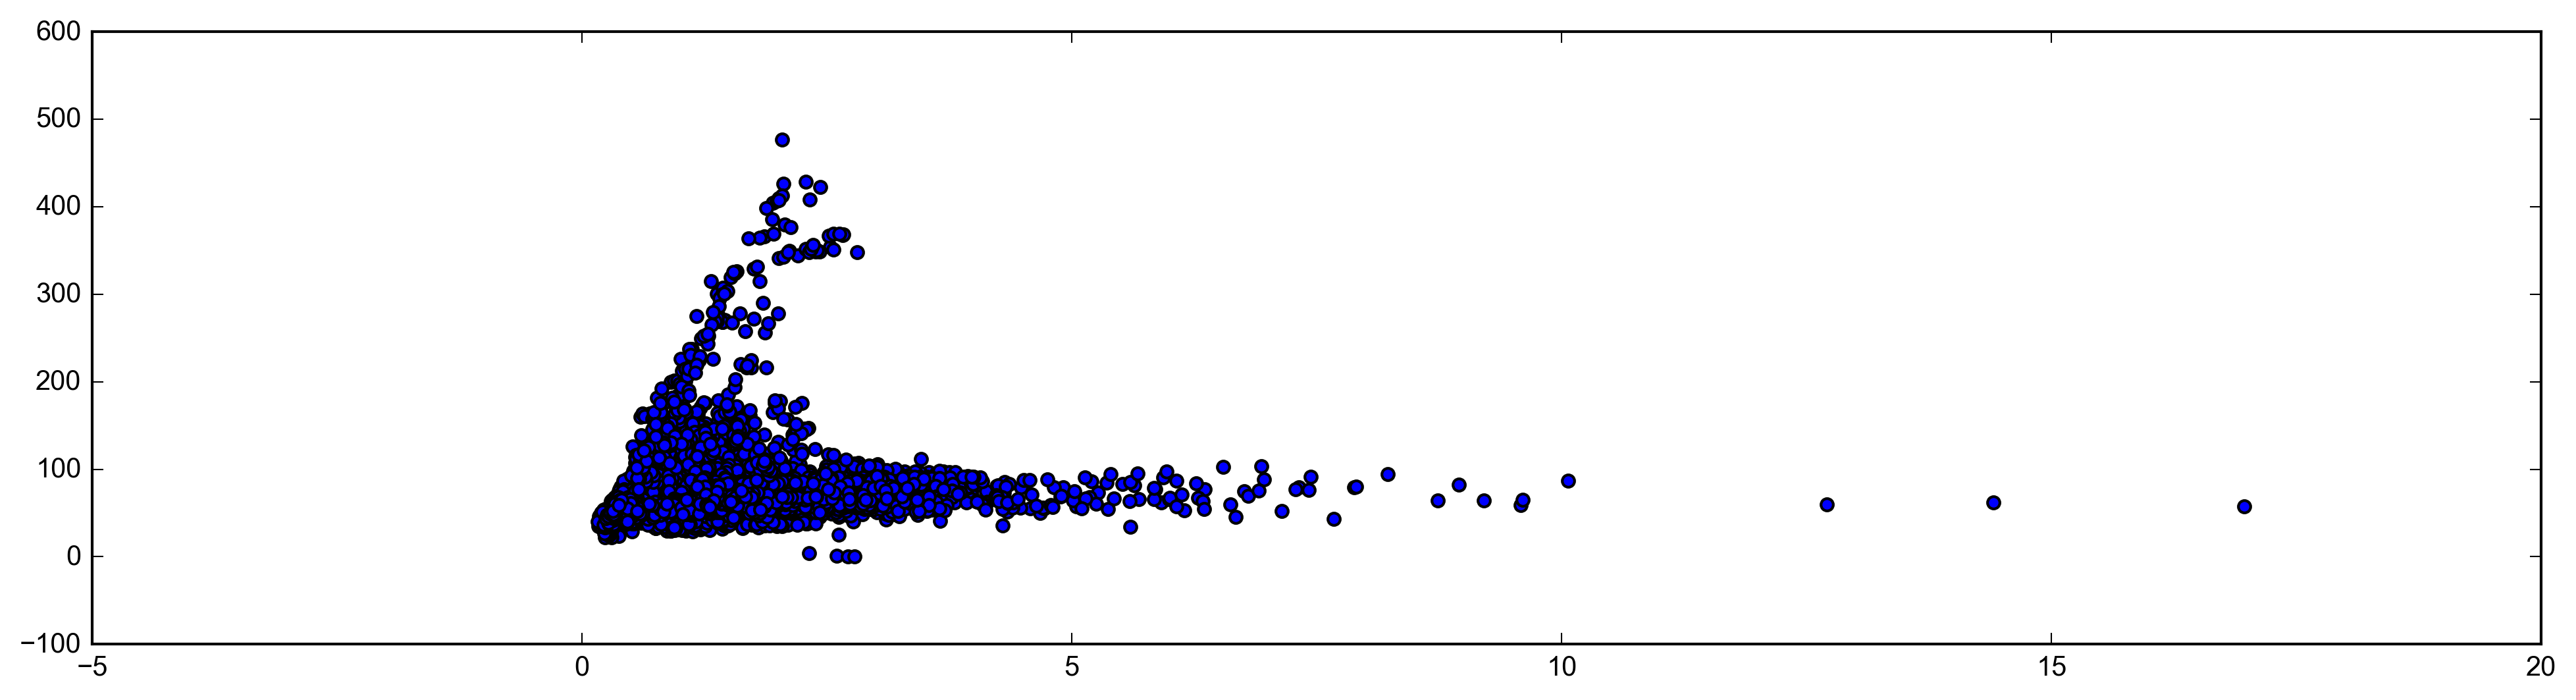

In [12]:
figure(figsize = (16,4), dpi = 600)
o3 = dc3file.variables['O3_ESRL']
NOy = dc3file.variables['NOy_ESRL']
NO = dc3file.variables['NO_ESRL']
scatter(NOy, o3)
ax = plt.gca()

Saved fig tsO3_ESRL.png


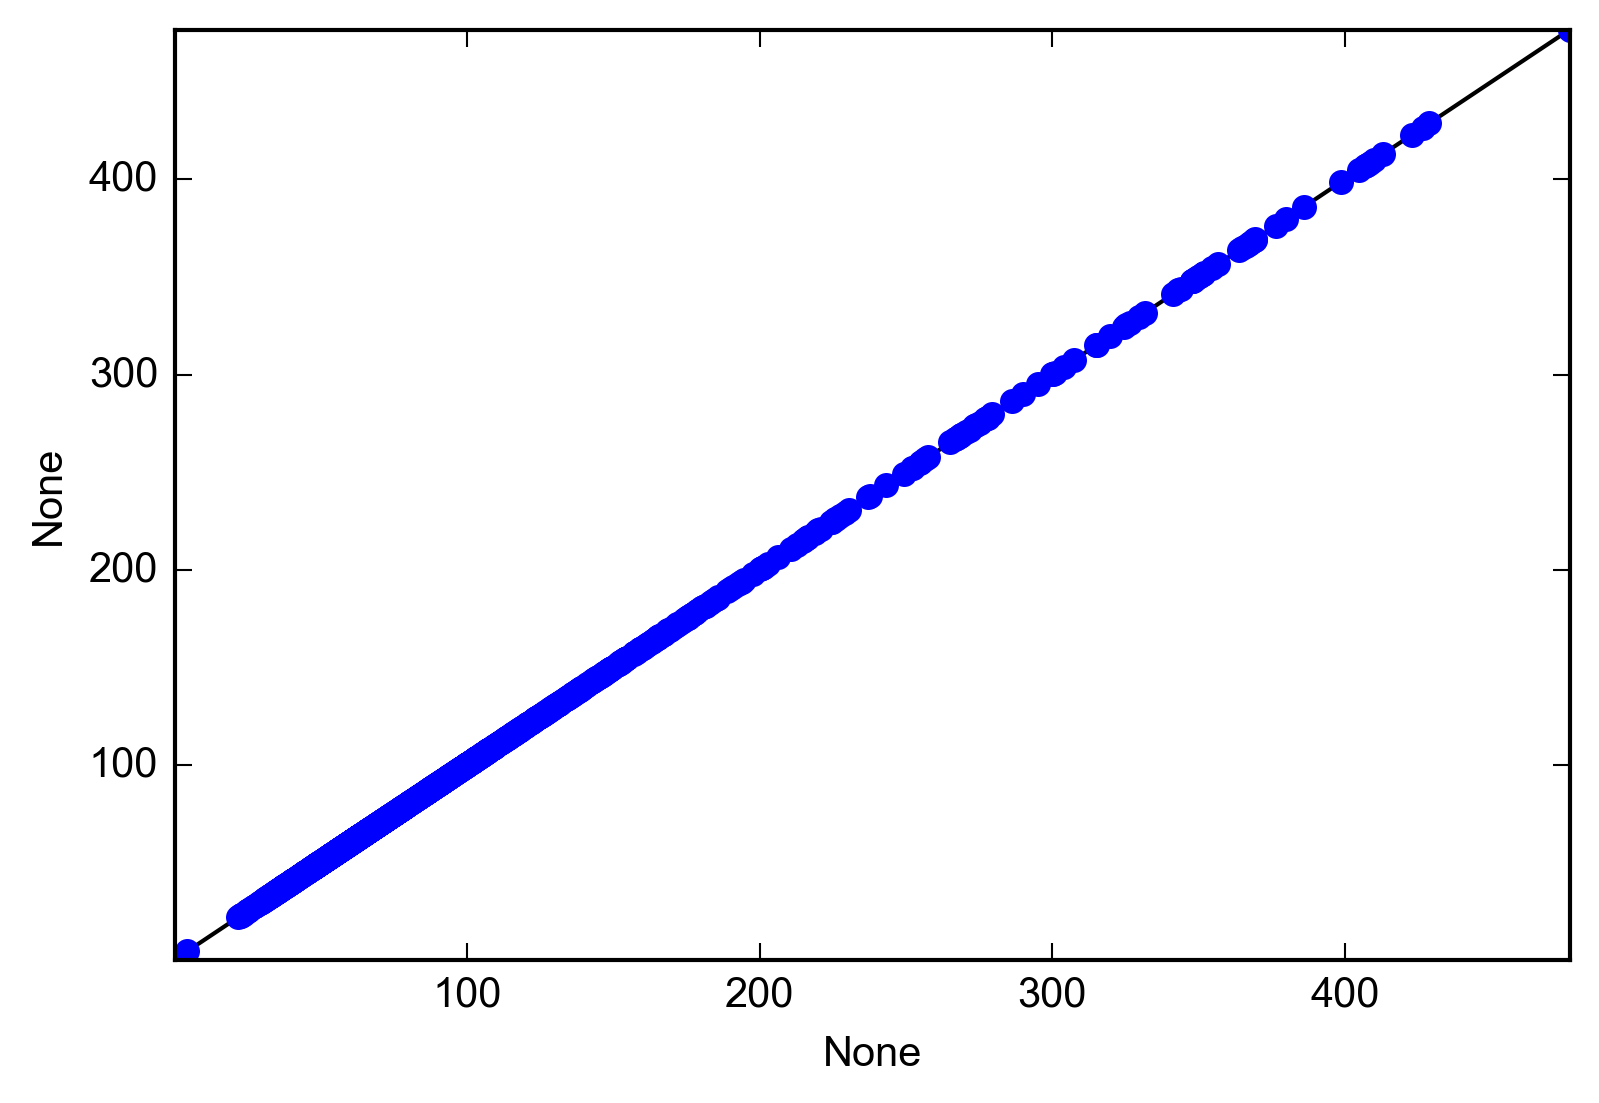

In [13]:
PNC('plotscatter', '--variables=O3_ESRL', '--verbose', '--figroot=ts', '--format=ffi1001',
    '--', dc3path,
    '--sep', '--variables=O3_ESRL', dc3path);

Saved fig tsO3.png


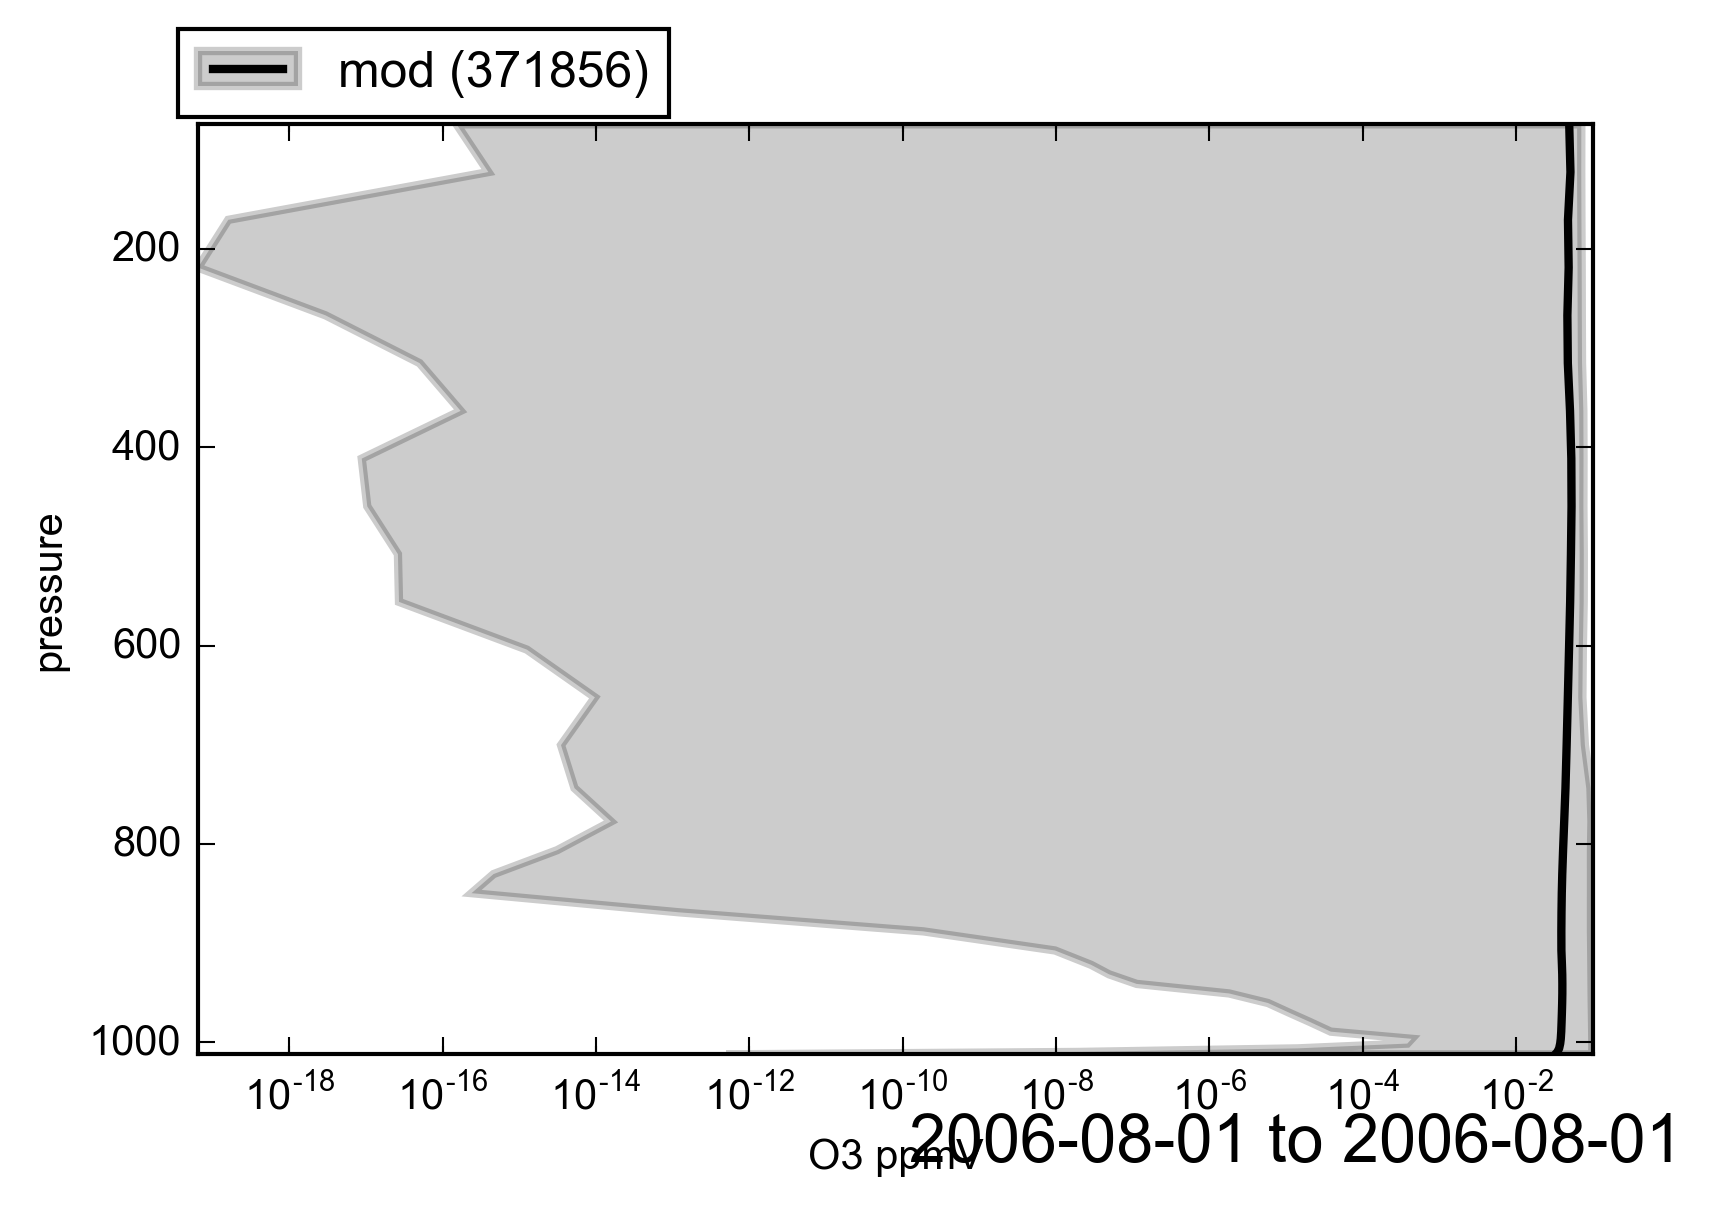

In [14]:
PNC('plotprofile', '--variables=O3', '--verbose', '--figroot=ts',
    aconcpath);

# Tile Plots

Make tile plots of ozone with 3 different methods from CMAQ data.

1. Python Environment
2. Python with PseudoNetCDF
3. Command Line Interface (terminal or DOS)
4. Advanced users will overlay observations
5. Advanced users will repeat with CAMx or GEOS-Chem

# Python only

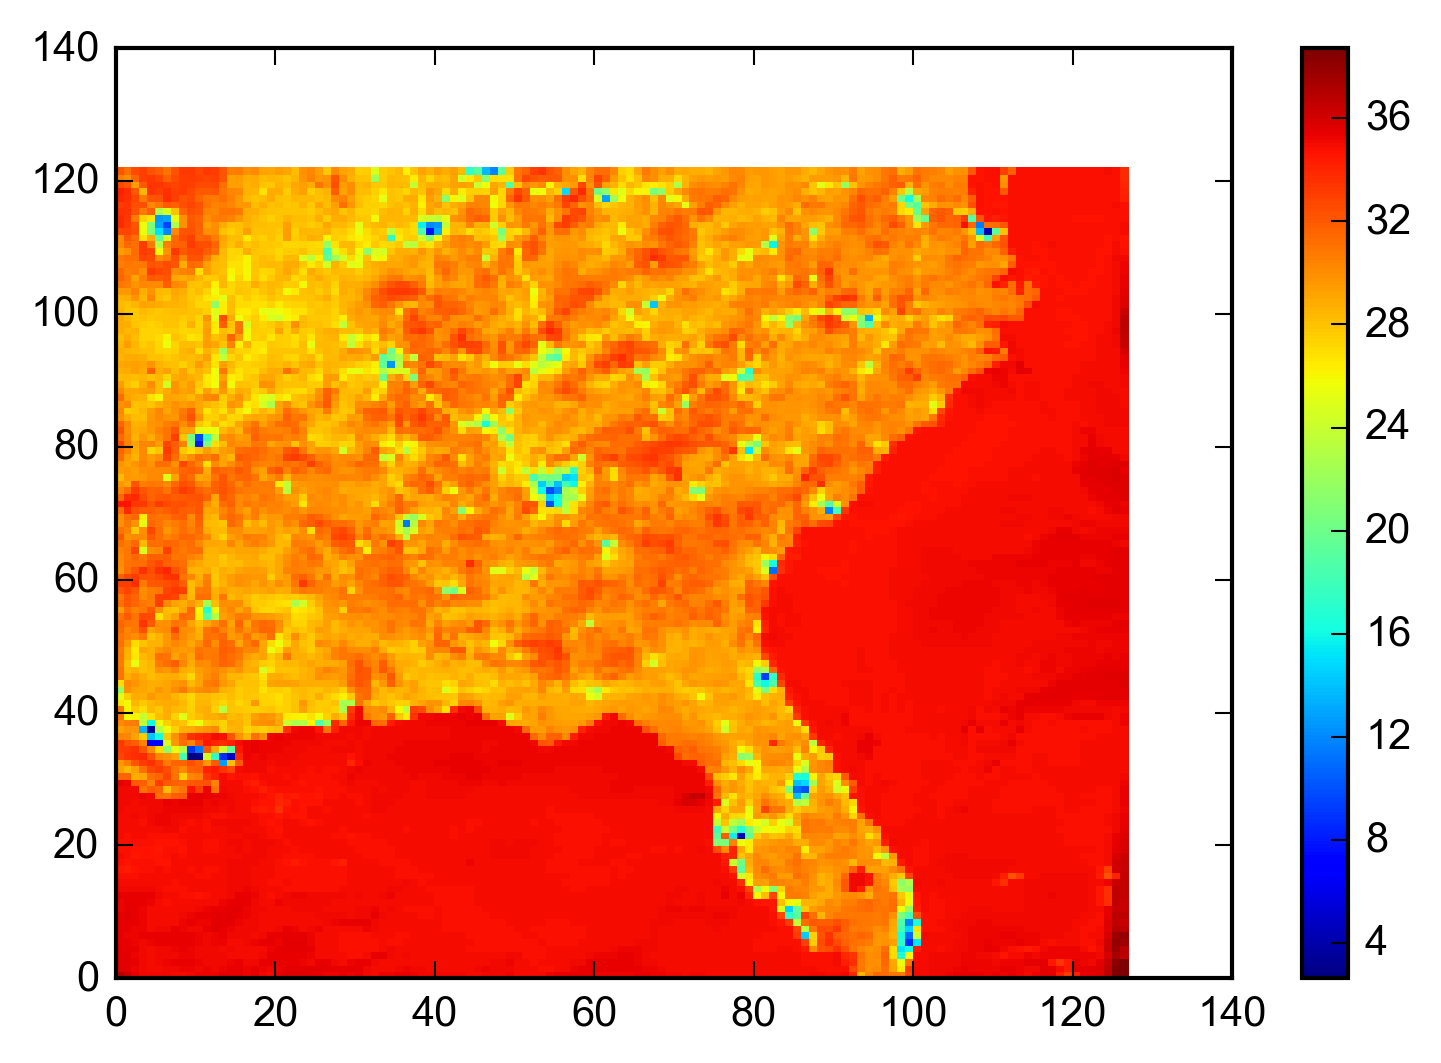

In [15]:
from netCDF4 import Dataset
cmaqfile = Dataset(aconcpath)
ozone = cmaqfile.variables['O3'][0, 0]
plt.pcolor(ozone*1000.);
plt.colorbar();

# With a little help from PNC

In [16]:
from PseudoNetCDF import PNC
from PseudoNetCDF.coordutil import getlonbnds, getlatbnds
cmaqargs = PNC('--from-conv=ioapi', aconcpath)
cmaqfile = cmaqargs.ifiles[0]
latb = cmaqfile.variables['latitude_bounds']
lonb = cmaqfile.variables['longitude_bounds']
ozone = cmaqfile.variables['O3'][0, 0]

In [17]:
LON, lonunit = getlonbnds(cmaqfile)
LAT, lonunit = getlatbnds(cmaqfile)

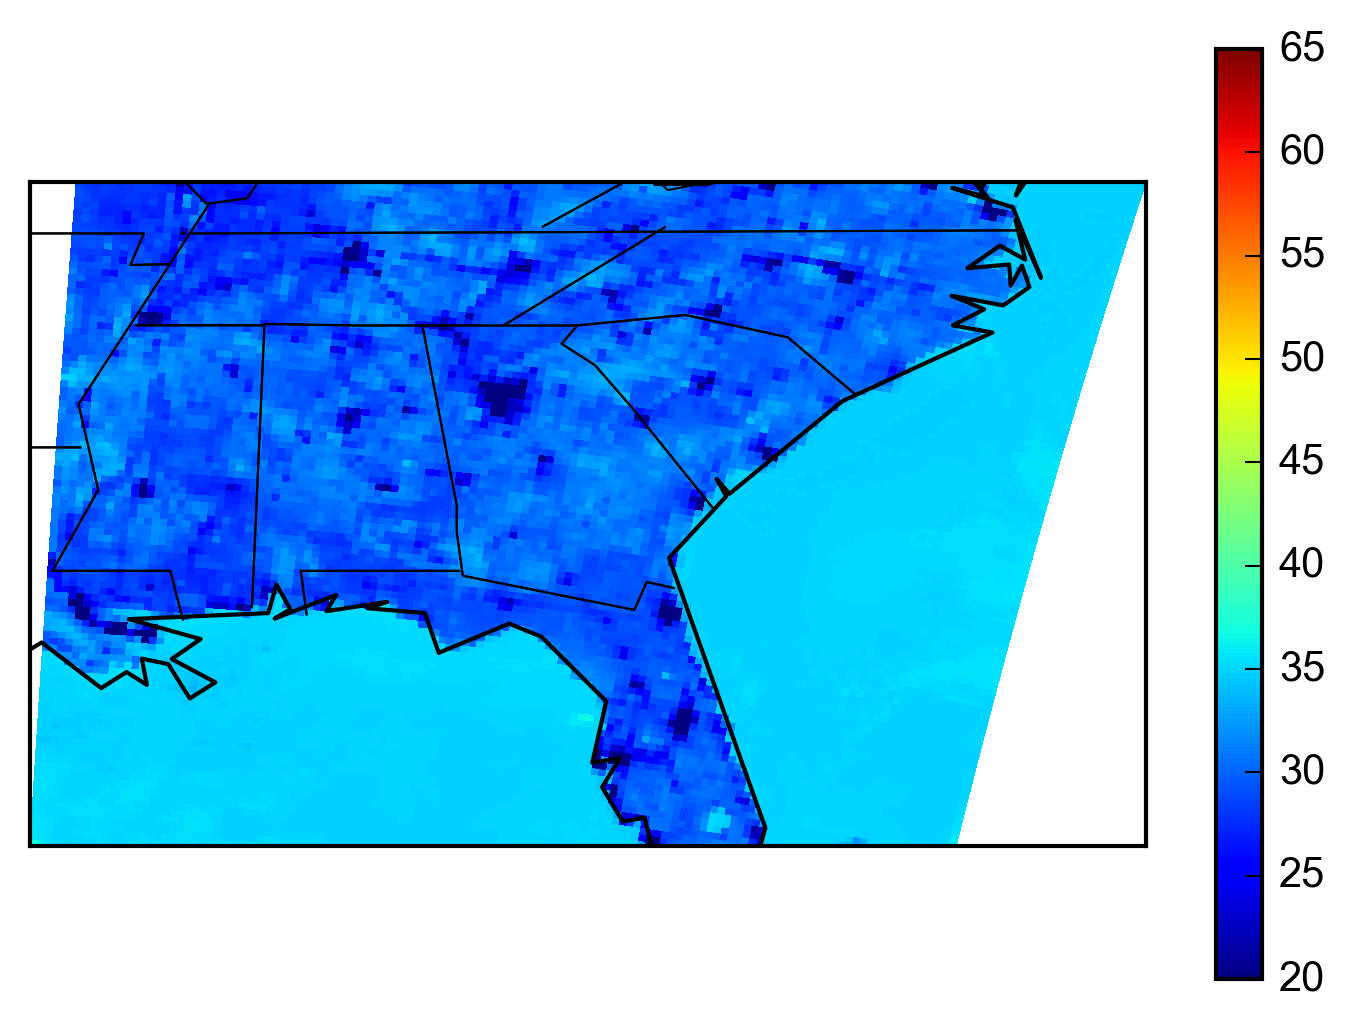

In [18]:
close()
from mpl_toolkits.basemap import Basemap
m = Basemap(llcrnrlat = LAT[0, 0], llcrnrlon = LON[0, 0],\
            urcrnrlat = LAT[-1, -1], urcrnrlon = LON[-1, -1],\
            resolution = 'c')
Z = ozone[:]*1000.
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.pcolor(LON, LAT, Z, vmin = 20, vmax = 65)
colorbar();

# PNC  Map

Found IO/API Mapping parameters


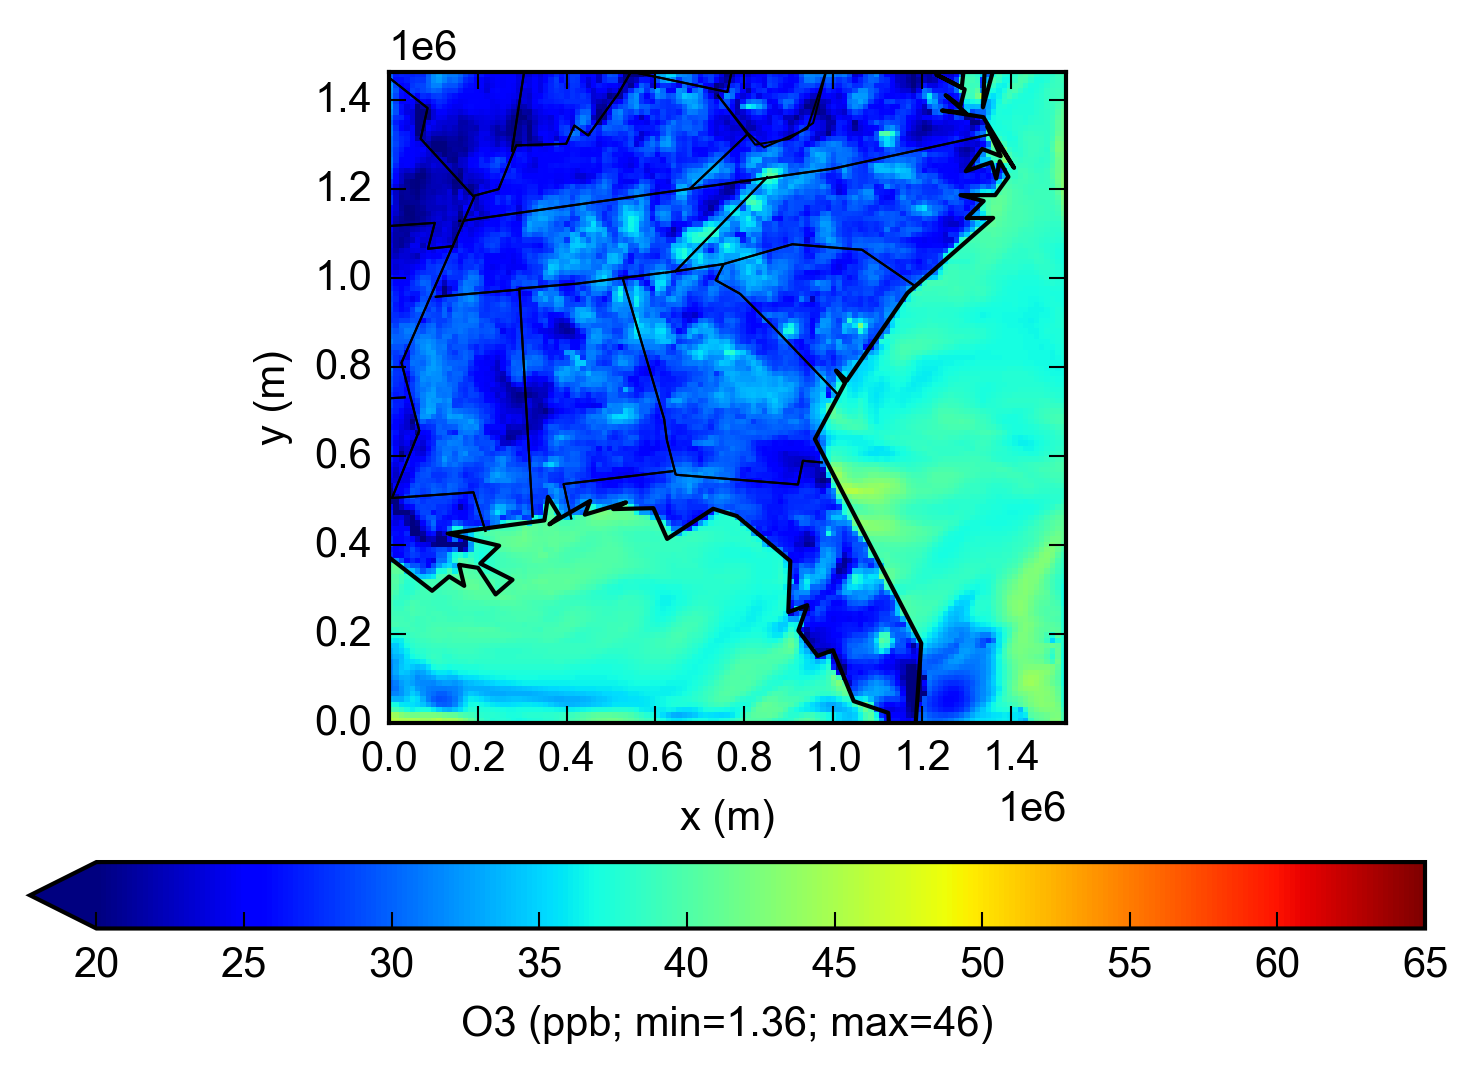

In [19]:
from PseudoNetCDF import PNC
args = PNC("map", "--states", "--norm=Normalize(20, 65)", "--figroot=map",\
           "--format=netcdf", "--from-conv=ioapi",\
           "--slice=LAY,0", "--reduce=TSTEP,mean", \
           "--variables=O3", \
           "--expr=O3=O3*1000.;O3.units='ppb';", \
           aconcpath)

**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/coordutil.py:181:UserWarning:
  Latitude bounds are approximate


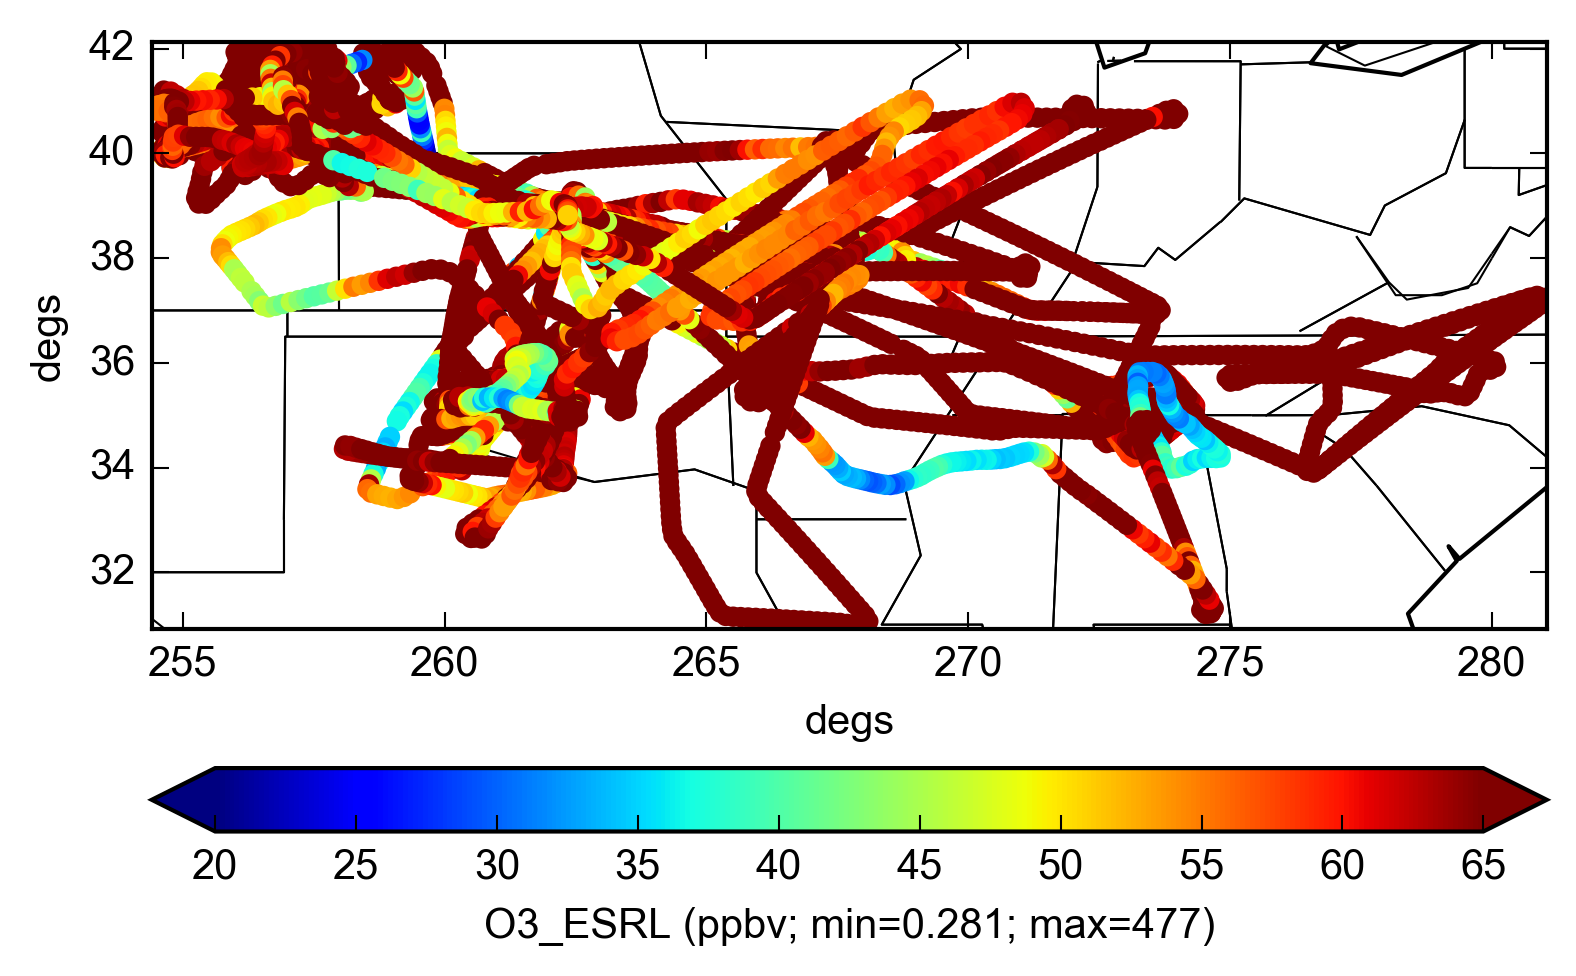

In [20]:
from PseudoNetCDF import PNC
args = PNC("map", "--states", "--norm=Normalize(20, 65)", "--figroot=map",
           "--format=ffi1001", "--variables=O3_ESRL",
           "--coordkeys=LATITUDE,LONGITUDE", '--expr=latitude=LATITUDE;longitude=LONGITUDE',
           dc3path)

#  Exercise: Overlay Observations and Model 

Observations cover:
- a different horizontal footprint
- a variables vertical range
- a different time period

Start: ignore this all this for now.


# Make a map with just CMAQ

pncmap.py is the primary map maker. Like all other pnc commands, it uses options that can be reviewed with --help. It shares all the same slicing, aggregating functions, but it also has a few options that are not included else where.

```
PNC('map', '--help')
```

Review the following options

- --matplotlibrc
- --figure-keywords
- --axes-keywords
- --plot-commands
- --figformat
- --norm
- --colorbar-formatter
- --overlay
- --resolution
- --no-countries, --states, --counties
- --shapefile
- --no-squeeze
- --iter

## Start by plotting the whole world for ozone at the surface layer

### Fill in the options below to plot may ozone at the surface

```
args = PNC("map", "--figroot=map",
           "--variables=<VARNAME>", "--slice=<LAYERSLICE>",
           aconcpath)
```

### Plot the average May/June value

- What does the --stack option do?
- How could you combine it with the  -r option to plot the average ozone over multiple days?


# Make a Map with just DC3 Observations

Hint: PNC('map', ...) expects latitude and longitude (case sensitive). You can use --expr or --rename to fix the case and --coordkeys to ensure these variables are not plotted and immune to -v.

**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/coordutil.py:181:UserWarning:
  Latitude bounds are approximate


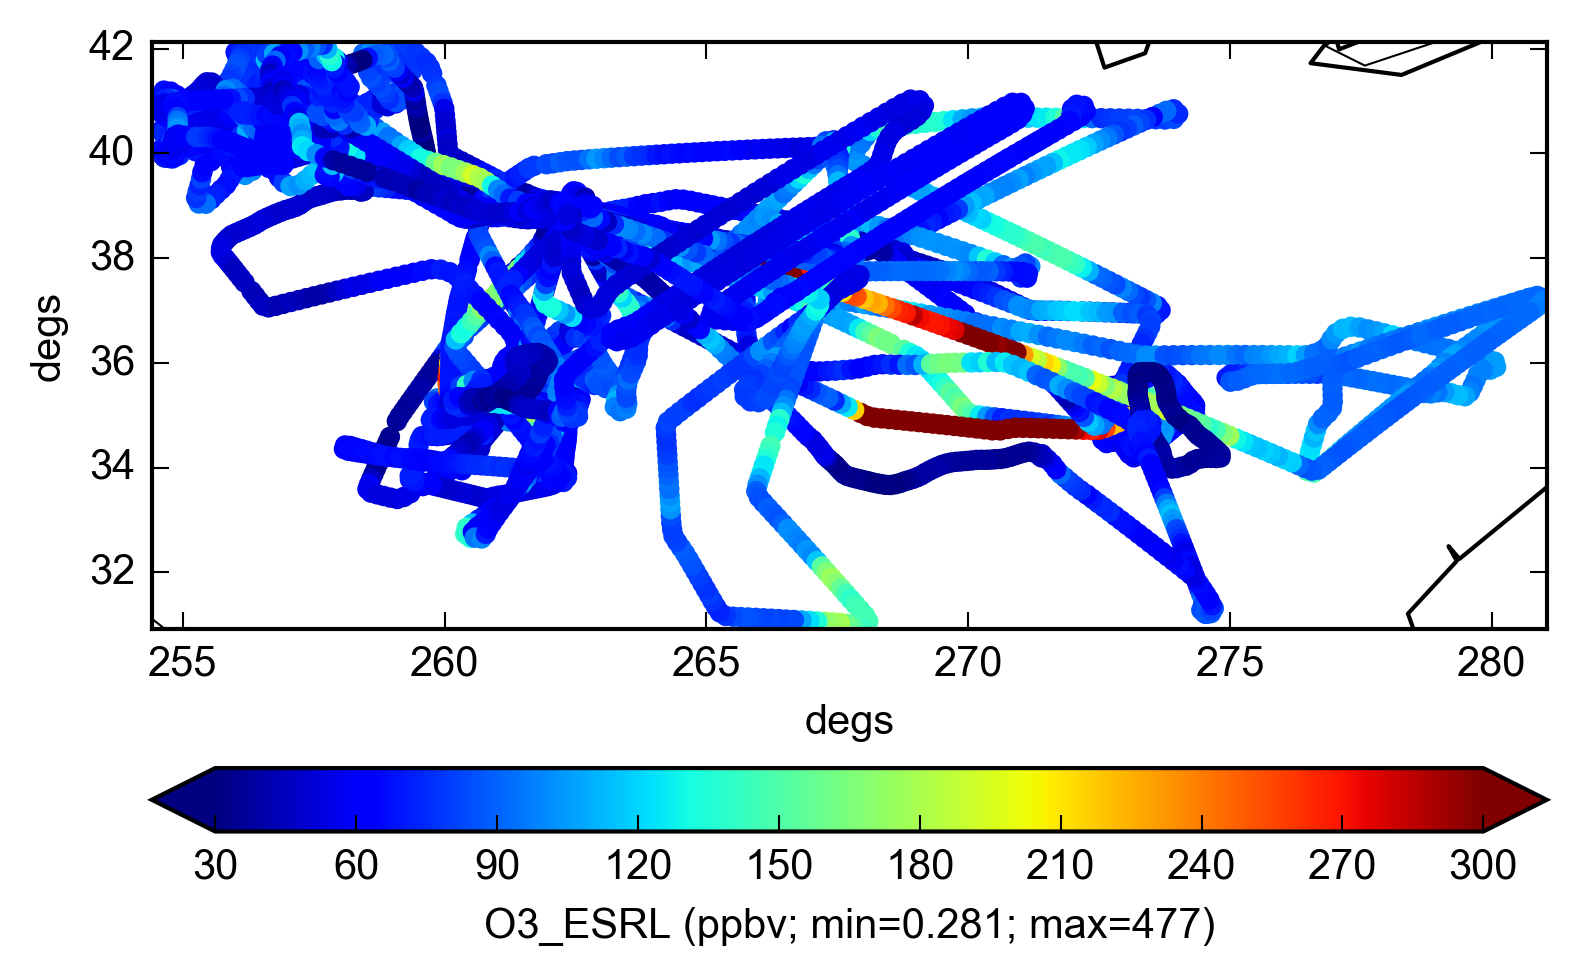

In [21]:
PNC('map', '--variables=LATITUDE,LONGITUDE,Fractional_Day,O3_ESRL',\
    '--expr=latitude=LATITUDE;longitude=LONGITUDE;time=Fractional_Day;time.units="days since 2004-12-31"',\
    '--format=ffi1001', dc3path, \
    '--norm=Normalize(vmin=30,vmax=300)', '--figroot=dc3');

# Combining PNC commands

Notice that the commands necessary to open ICARTT (ffi1001) and GEOS-Chem (bpch) files were different. We can separate commands and apply them only to one file using the --pnc option. Make notes below about the pnc option:

## Now use one command to make both maps.

* Hint 1: Rename O3_ESRL to O3
* Hint 2: Escaping quotes is important
* Hint 3: Use --expr to redefine DC2 longitude on -182.5, 177.5 use np.where

# ANSWERS Hidden

<div class="answers">
```
from PseudoNetCDF import PNC
args = PNC("map", "--states", "--norm=Normalize(20, 65)", "--figroot=map", "--attribute=GDTYP,global,o,i,0", 
           "--variables=O3", "--overlay",
           "--",
           "--from-conv=ioapi", "--slice=LAY,25", "--reduce=TSTEP,mean",
           "--expr=O3=O3*1000.;O3.units='ppb'", aconcpath,
           "--sep",
           "--format=ffi1001", "--variables=O3_ESRL", "--coordkeys=LATITUDE,LONGITUDE",
           '--expr=O3=O3_ESRL;latitude=LATITUDE;longitude=np.ma.where(LONGITUDE>180,LONGITUDE-360,LONGITUDE)', dc3path)
```

</div>

## Now lets make this map better!

- Focus in on the observations region
- Mask all observations that are not within the model layer pressures
- Add a title

# Mask data outside the domain

- read help for the --mask option
- construct four masks for all data "where"
  - the longitude variable is less than -90 (aka 90 west)
  - the longitude variable is greater than -75 (aka 75 west)
  - the pressure is outside your layer

# ANSWERS Hidden

<div class="answers">

<[!CDATA[
```

  "--overlay",
  "--mask=where,LONGITUDE<(-90%360)", "--mask=where,LONGITUDE>(-75%360)",
  "--mask=where,LATITUDE<25", "--mask=where,LATITUDE>39",
  "--mask=where,PRESSURE>509.44953", "--mask=where,PRESSURE<441.74707",
  "--axes-keywords=title='one'" or "--plot-commands=plt.title('one')"

```
]]>

```
from PseudoNetCDF import PNC
args = PNC("map", "--states", "--norm=Normalize(20, 65)", "--figroot=map", "--attribute=GDTYP,global,o,i,0", 
           "--variables=O3", "--overlay",
           "--",
           "--from-conv=ioapi", "--slice=LAY,25", "--reduce=TSTEP,mean",
           "--expr=O3=O3*1000.;O3.units='ppb'", aconcpath,
           "--sep",
           "--mask=where,LONGITUDE<(-90%360)", "--mask=where,LONGITUDE>(-75%360)",
           "--mask=where,LATITUDE<25", "--mask=where,LATITUDE>39",
           "--mask=where,PRESSURE>509.44953", "--mask=where,PRESSURE<441.74707",
           "--format=ffi1001", "--variables=O3_ESRL", "--coordkeys=LATITUDE,LONGITUDE",
           '--expr=O3=O3_ESRL;latitude=LATITUDE;longitude=np.ma.where(LONGITUDE>180,LONGITUDE-360,LONGITUDE)', 
           dc3path)


```
</div> 

**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/coordutil.py:181:UserWarning:
  Latitude bounds are approximate


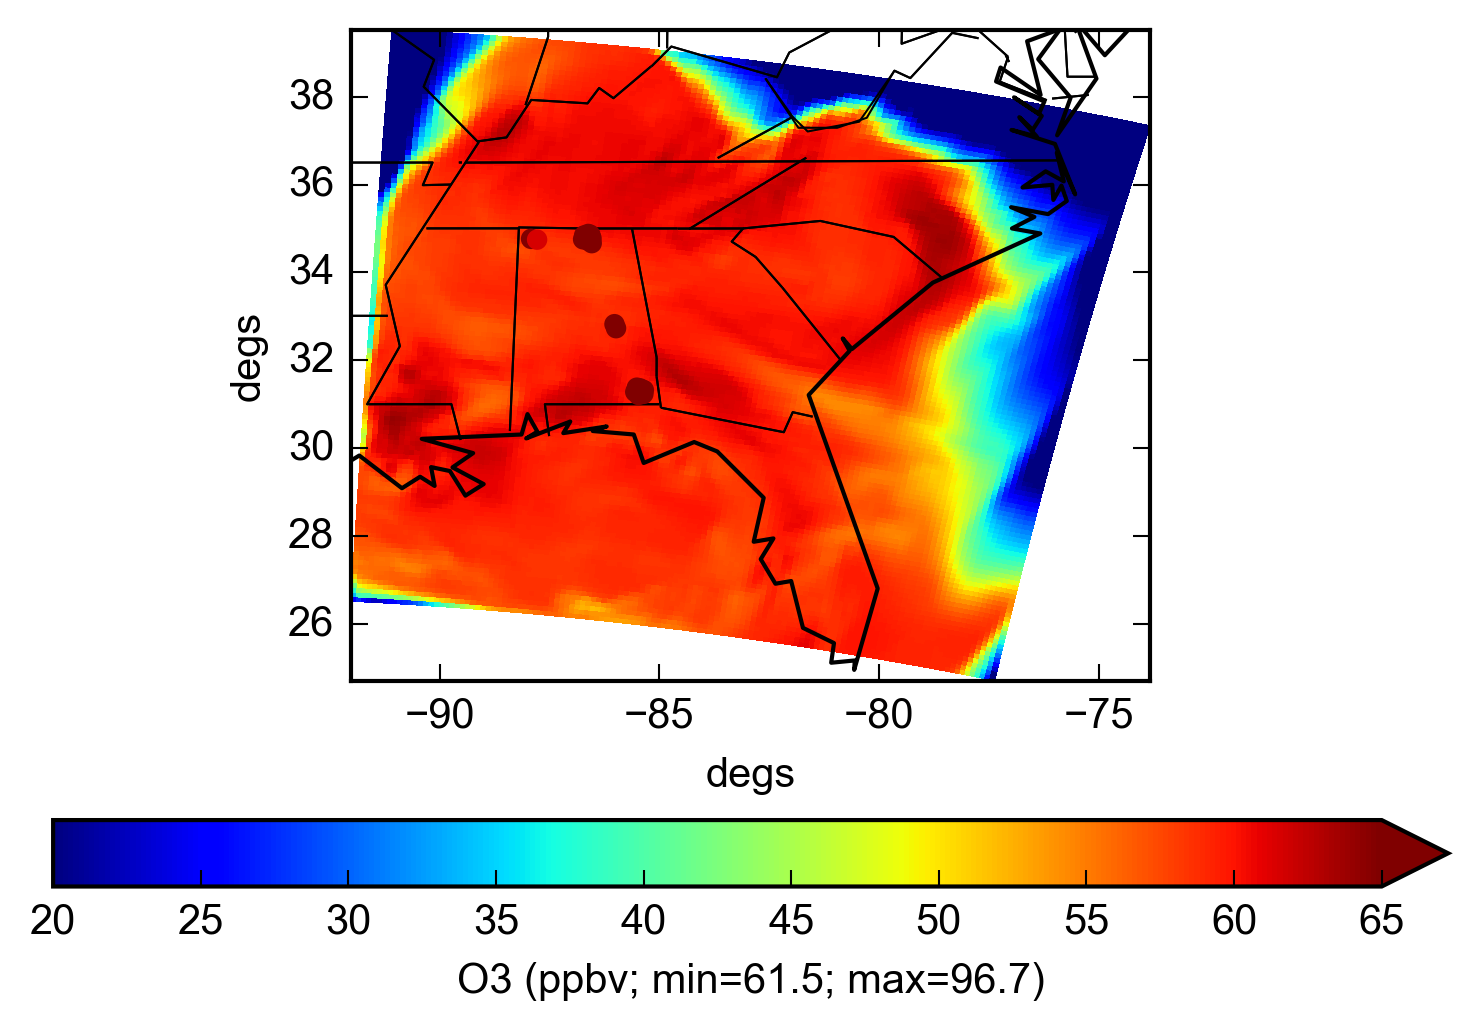

In [23]:
from PseudoNetCDF import PNC
args = PNC("map", "--states", "--norm=Normalize(20, 65)", "--figroot=map", "--attribute=GDTYP,global,o,i,0", 
           "--variables=O3", "--overlay",
           "--",
           "--from-conv=ioapi", "--slice=LAY,25", "--reduce=TSTEP,mean",
           "--expr=O3=O3*1000.;O3.units='ppb'", aconcpath,
           "--sep",
           "--mask=where,LONGITUDE<(-90%360)", "--mask=where,LONGITUDE>(-75%360)",
           "--mask=where,LATITUDE<25", "--mask=where,LATITUDE>39",
           "--mask=where,PRESSURE>509.44953", "--mask=where,PRESSURE<441.74707",
           "--format=ffi1001", "--coordkeys=longitude,latitude",
           '--expr=O3=O3_ESRL;latitude=LATITUDE;longitude=np.ma.where(LONGITUDE>180,LONGITUDE-360,LONGITUDE)', 
           dc3path)

# Splitting Reads

In [24]:
dc3args = PNC('--format=ffi1001', 
           '--expr=O3=O3_ESRL;',
           '--expr=time=Fractional_Day;time.units="days since 2005-12-31"',
           '--expr=latitude=LATITUDE',
           '--expr=longitude=np.ma.where(LONGITUDE>180,LONGITUDE-360,LONGITUDE)', 
           "--mask=where,LONGITUDE<(-90%360)", "--mask=where,LONGITUDE>(-75%360)",
           "--mask=where,LATITUDE<25", "--mask=where,LATITUDE>39",
           "--mask=where,PRESSURE>509.44953", "--mask=where,PRESSURE<441.74707",
           "--coordkeys=Fractional_Day",
           dc3path)
dc3file = dc3args.ifiles[0]

In [25]:
cmaqargs = PNC("--slice=LAY,25", "--reduce=TSTEP,mean", "--from-conv=ioapi",
               "--expr=O3=O3*1000;O3.units='ppb'",
               aconcpath)
cmaqfile = cmaqargs.ifiles[0]

**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/coordutil.py:181:UserWarning:
  Latitude bounds are approximate
**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/coordutil.py:230:UserWarning:
  Longitude bounds are approximate


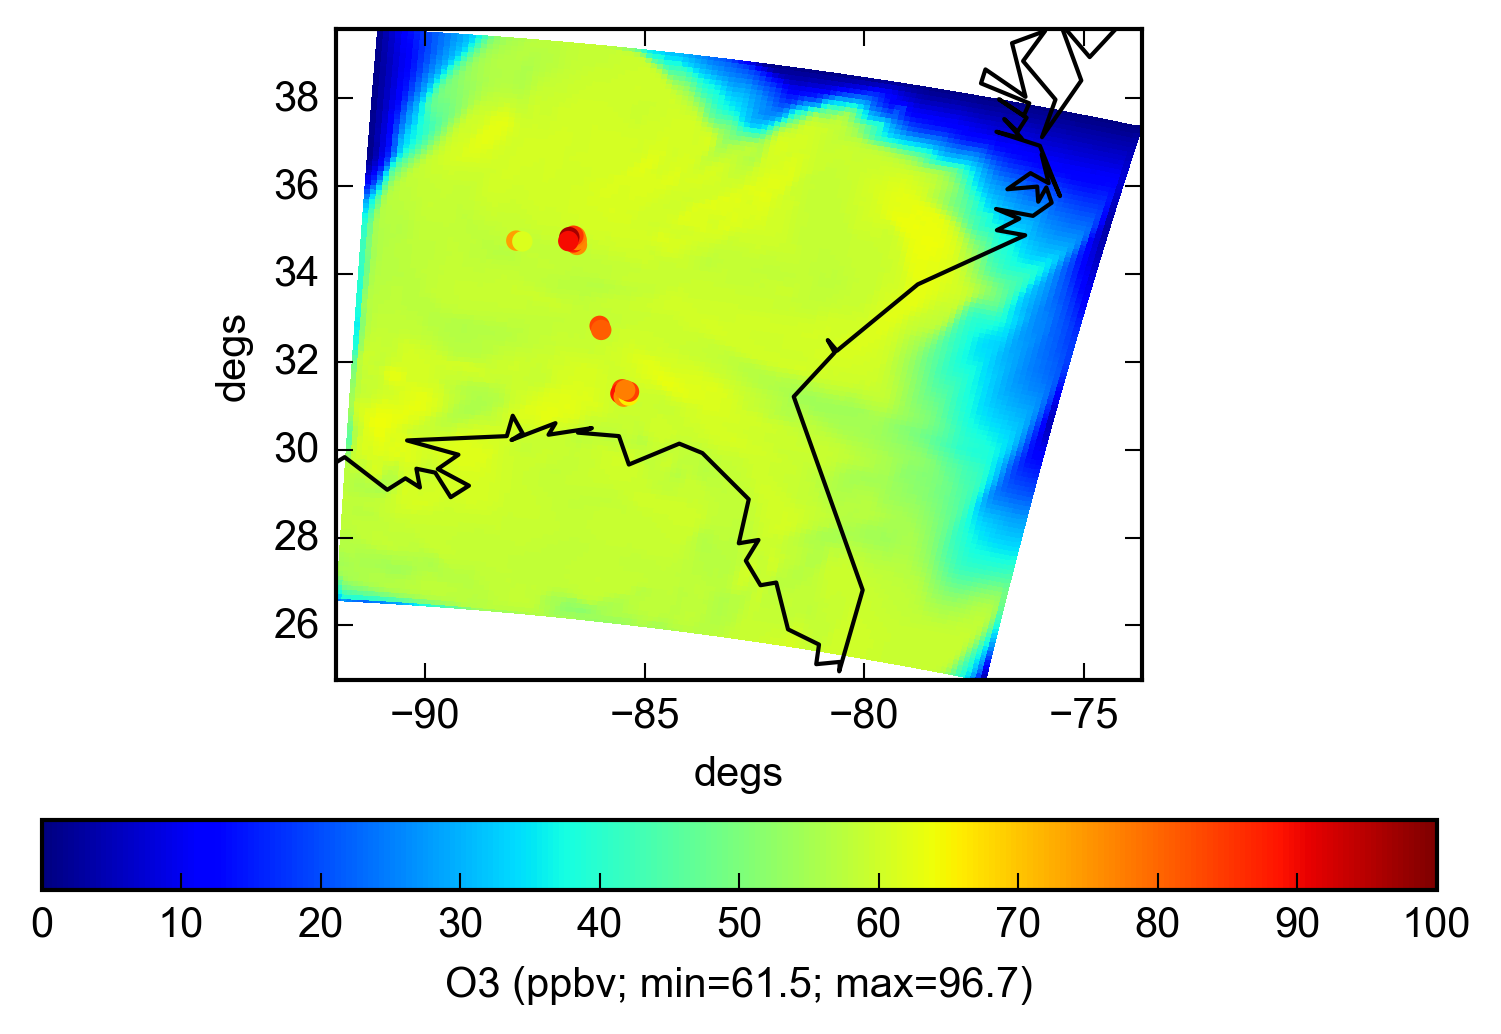

In [26]:
args = PNC("map", "--variables=O3", "--coordkeys=latitude,longitude,time", "--attribute=GDTYP,global,o,i,0",
           "--norm=Normalize(vmin=0,vmax=100)", "--overlay", "--figroot=mapout",
           ifiles = [cmaqfile, dc3file])

# Evaluate Model with Observations

In [27]:
from PseudoNetCDF.pncgen import pncgen
help(pncgen)
os.remove('dc3.nc')
pncgen(dc3file, 'dc3.nc', verbose = 0)
extargs = PNC('--extract-file=dc3.nc', ifiles = [cmaqfile])
os.remove('cmaq.nc')
pncgen(extargs.ifiles[0], 'cmaq.nc', verbose = 0);

Help on function pncgen in module PseudoNetCDF.pncgen:

pncgen(ifile, outpath, inmode='r', outmode='w', format='NETCDF4_CLASSIC', verbose=1)



# dc3nc_0 = ifile0 = dc3.nc
# cmaqnc_0 = ifile1 = cmaq.nc
# ifile0=dc3.nc
# ifile1=cmaq.nc
# Stats calculated as func(ifile0, ifile1)
# Generally: func(obs, mod, ....)
# Meta-data from dc3.nc
# Date Range: 2006-05-19 19:03:30.240000 to 2006-06-24 02:51:30.240000
# Longitude Range: -87.920009 to -85.35313059999999
# Latitude Range: 31.2096148 to 34.87504978
# Meta-data from cmaq.nc
# Longitude Range: -91.95660860764922 to -85.32463180556576
# Latitude Range: 26.565206591830595 to 34.9038842371199
O3,N Observations (#),NO,18.000000
O3,N Predictions (#),NP,6817.000000
O3,N Observations/Prediction Pairs (#),NOP,18.000000
O3,Mean Observations (obs unit),MO,80.192654
O3,Mean Predictions (model unit),MP,25.459953
O3,Median Observations (obs unit),MdnO,79.584885
O3,Median Predictions (model unit),MdnP,25.370268
O3,Standard deviation of Observations,STDO,8.346354


**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/pnceval.py:387:UserWarning:
  too many indices for array


O3,Standard deviation of Predictions,STDP,1.743099
O3,Mean Ratio Observations/Predictions (none),RM,1.351267
O3,Median Ratio Observations/Predictions (none),RMdn,1.338558
O3,Mean Bias,MB,-20.856895
O3,Median Bias,MdnB,-20.121323
O3,Wind Direction Mean Bias,WDMB,-20.856895
O3,Wind Direction Median Bias,WDMdnB,-20.121323
O3,Fractional Bias (%),FB,-29.271825
O3,Mean Normalized Bias (%),MNB,-25.167579
O3,Median Normalized Bias (%),MdnNB,-25.249219
O3,Normalized Mean Bias (%),NMB,-26.008485
O3,Normalized Median Bias (%),NMdnB,-25.282845
O3,Unpaired Space/Unpaired Time Peak Bias (%),USUTPB,-38.201719
O3,Paired Space/Unpaired Time Mean Normalized Peak Bias (%),PSUTMNPB,-38.201719
O3,Paired Space/Unpaired Time Median Normalized Peak Bias (%),PSUTMdnNPB,-38.201719
O3,Paired Space/Unpaired Time Normalized Mean Peak Bias (%),PSUTNMPB,-38.201719
O3,Paired Space/Unpaired Time Normalized Median Peak Bias (%),PSUTNMdnPB,-38.201719
O3,Mean Gross Error (model and obs unit),ME,20.856895
O3,Median Gross 

**PNC:/Users/barronh/anaconda3/envs/atmsci/lib/python3.5/site-packages/scipy/stats/stats.py:3029:RuntimeWarning:
  invalid value encountered in double_scalars
**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/pnceval.py:404:UserWarning:
  Skipped RMSEs;ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/pnceval.py:404:UserWarning:
  Skipped RMSEu;ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


O3,Coefficient of Determination (unit squared),R2,0.136948
O3,Root Mean Square Error (model unit),RMSE,22.423907
O3,Modified Coefficient of Efficiency, E1,E1,-2.124324
O3,Index of Agreement, IOA,IOA,0.358974
O3,Modified Index of Agreement, d1,d1,0.242464
O3,Anomaly Correlation,AC,0.000109
O3,Wind Direction Index of Agreement, IOA,WDIOA,0.358974
O3,Wind Direction Root Mean Square Error (model unit),WDRMSE,22.423907
O3,Wind Direction Anomaly Correlation,WDAC,0.000109


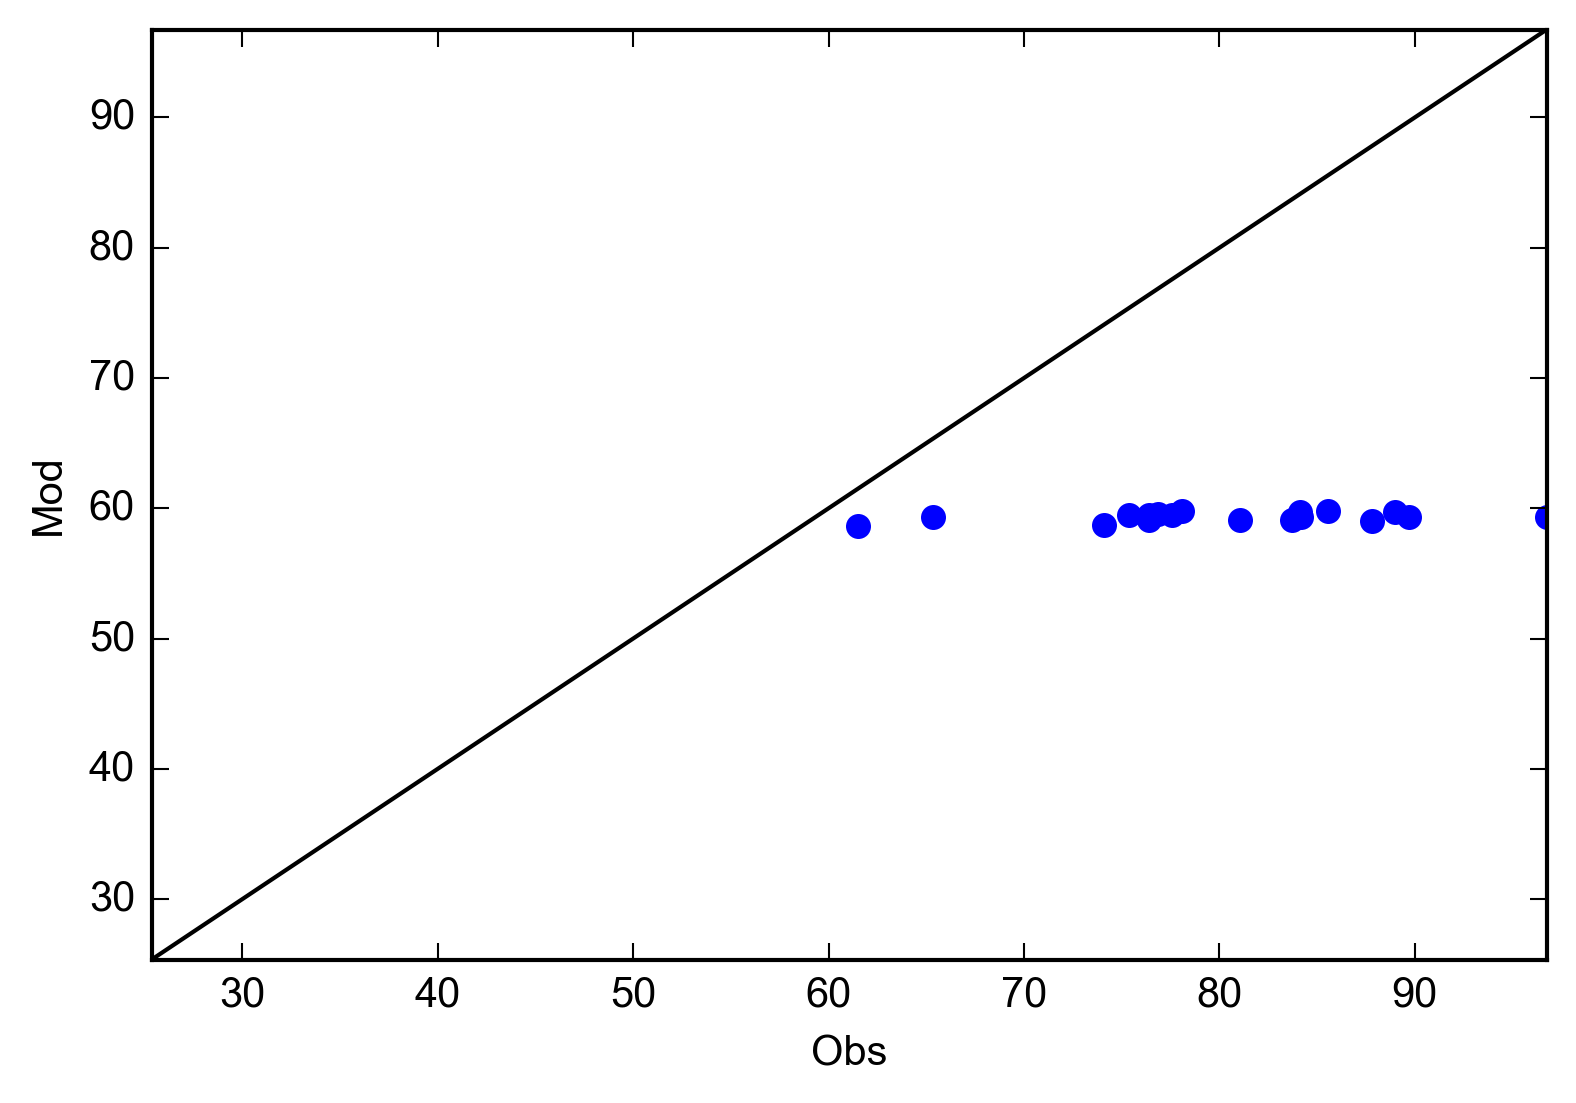

In [28]:
from PseudoNetCDF import PNC
PNC('plotscatter', "--figroot=scat", "--plot-commands=plt.xlabel('Obs')", "--plot-commands=plt.ylabel('Mod')", '--variables=O3', 'dc3.nc', 'cmaq.nc', actions = True)
pairedargs = PNC('eval', '--remove-singleton=LAY,TSTEP', '--variables=O3', 'dc3.nc', 'cmaq.nc', actions = True)